In [1761]:
%autosave 60

Autosaving every 60 seconds


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from odc import DetectOutliers

df = pd.read_csv("F_14.csv",  parse_dates=["DATEPRD"], index_col="DATEPRD")

# Creating an instance of the DetectOutliers class and passing the df DataFrame as an argument
clean = DetectOutliers(df)


# Detecting outliers in the 'ON_STREAM_HRS' variable
ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('ON_STREAM_HRS', 'BORE_OIL_VOL')
ON_STREAM_HRS_outliers 


# Plotting the outliers detected in the 'ON_STREAM_HRS' variable
clean.plot_outliers(ON_STREAM_HRS_outliers)

# Treating outliers in the 'ON_STREAM_HRS' variable
df['ON_STREAM_HRS'] = clean.treat_outliers_in_time()

clean.detect_outliers_in_time('ON_STREAM_HRS', 'BORE_OIL_VOL')


In [1763]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from odc import DetectOutliers

In [1765]:
df = pd.read_csv("F_14.csv",  parse_dates=["DATEPRD"], index_col="DATEPRD")

In [1766]:
# Check the summary statisctics to understand how the data looks like and what variables need to be cleaned
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,1828.0,2.184119e+01,6.049317e+00,0.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.500000e+01
AVG_DOWNHOLE_PRESSURE,1828.0,3.583535e+03,3.736376e+02,0.000000,3.507718e+03,3.573179e+03,3.730074e+03,4.395827e+03
AVG_DOWNHOLE_TEMPERATURE,1828.0,2.146251e+02,1.601213e+01,32.000000,2.120452e+02,2.147617e+02,2.199967e+02,2.241909e+02
AVG_DP_TUBING,1828.0,3.019579e+03,3.544794e+02,39.914966,2.869027e+03,2.985325e+03,3.208013e+03,4.381732e+03
AVG_ANNULUS_PRESS,1764.0,1.500441e+02,1.490430e+02,0.000000,0.000000e+00,1.665043e+02,3.122287e+02,3.869932e+02
AVG_CHOKE_SIZE_P,1802.0,7.592665e+01,2.784896e+01,0.000000,5.820964e+01,8.792593e+01,1.000000e+02,1.000000e+02
AVG_WHP_P,1828.0,5.725364e+02,2.193123e+02,4.962176,4.668374e+02,5.025752e+02,6.080249e+02,1.823394e+03
AVG_WHT_P,1828.0,1.830155e+02,2.914898e+01,33.784862,1.869712e+02,1.898920e+02,1.925296e+02,2.003173e+02
DP_CHOKE_SIZE,1828.0,1.522701e+02,2.390019e+02,0.914898,4.219301e+01,7.684254e+01,1.640220e+02,1.823394e+03
BORE_OIL_VOL,1828.0,7.261419e+03,5.028466e+03,0.000000,2.982109e+03,6.274401e+03,1.118668e+04,2.000594e+04


In [1767]:
# remove average annulur pressure and pressure drop across the wellbore
df = df.drop(["AVG_ANNULUS_PRESS", "AVG_DP_TUBING"], axis=1)

In [1768]:
# All variables have to be postive
df= np.abs(df)
# replace duplciated rows with NaN so that we can interpolate them later
df[df.duplicated()] = np.nan
# interpolate missing values
df = df.interpolate(method='linear', limit_direction='both', axis=0)

# Outliers analysis & treatment

We will use the `DetectOutliers` class to identify and treat outliers in the data.

In [1769]:
# Creating an instance of the DetectOutliers class and passing the df DataFrame as an argument
clean = DetectOutliers(df)

* Production on stream hours 

In [1770]:
# Detecting outliers in the 'ON_STREAM_HRS' variable
ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('ON_STREAM_HRS', 'BORE_OIL_VOL')
ON_STREAM_HRS_outliers 

DATEPRD
2010-10-31    25.000000
2012-09-12     0.239583
2012-09-13     0.479165
2012-09-14     0.718747
2012-09-15     0.958330
2013-10-27    24.308330
2014-10-26    25.000000
Name: ON_STREAM_HRS, dtype: float64

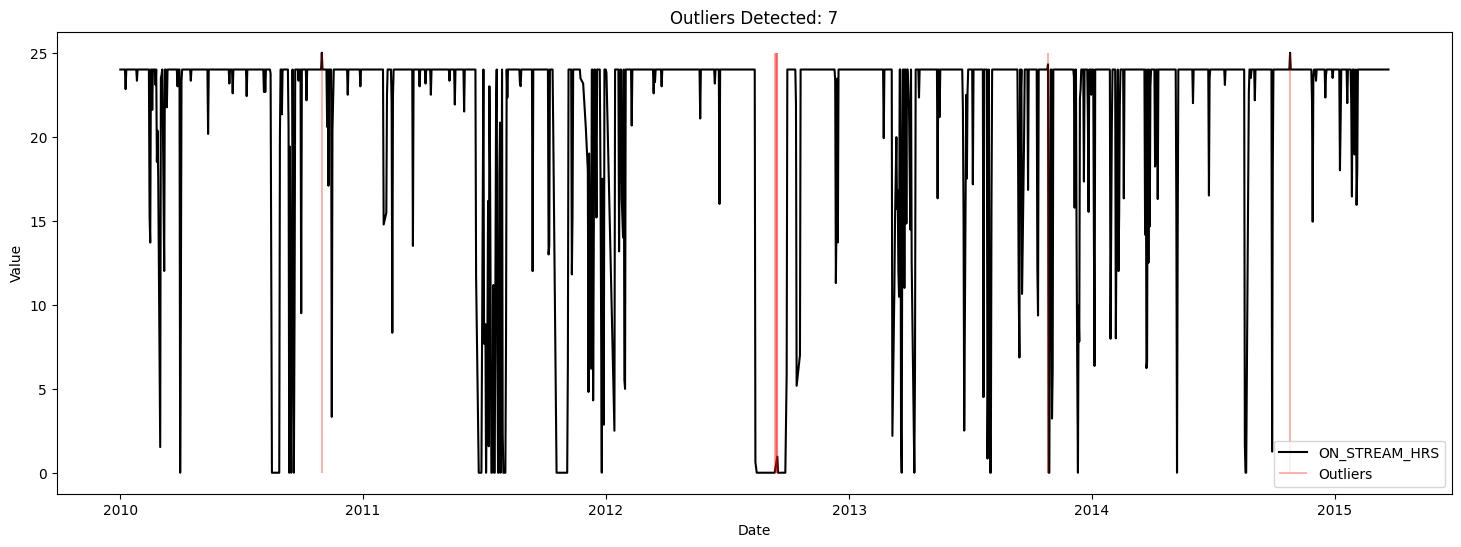

In [1771]:
# Plotting the outliers detected in the 'ON_STREAM_HRS' variable
clean.plot_outliers(ON_STREAM_HRS_outliers)

After calling the detect_outliers_in_time method, you do not need to specify the name of the variable for which you have detected the outliers. The method automatically records all the required information for treatment. To treat the outliers, you can call the `treat_outliers_in_time` method on the same variable.

However, when using `treat_outliers_with_roc`, you must input the series of the variable. It is important to call `treat_outliers_in_time()` on the same variable that you detected the outliers for. This will prevent the treated values from being initialized for another variable

In [1772]:
df['ON_STREAM_HRS'] = clean.treat_outliers_in_time()

In [1773]:
# Detecting outliers in the 'ON_STREAM_HRS' variable
ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('ON_STREAM_HRS', 'BORE_OIL_VOL')
ON_STREAM_HRS_outliers 

'No outliers detected.'

* Injection on stream hours for well F_4

In [1774]:
# Detecting outliers in the 'F_4_ON_STREAM_HRS' variable
F_4_ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('F_4_ON_STREAM_HRS', 'F_4_BORE_WI_VOL')
F_4_ON_STREAM_HRS_outliers

DATEPRD
2010-08-16     1.75833
2012-01-03    11.22500
2013-10-27    24.14167
2014-10-26    25.00000
Name: F_4_ON_STREAM_HRS, dtype: float64

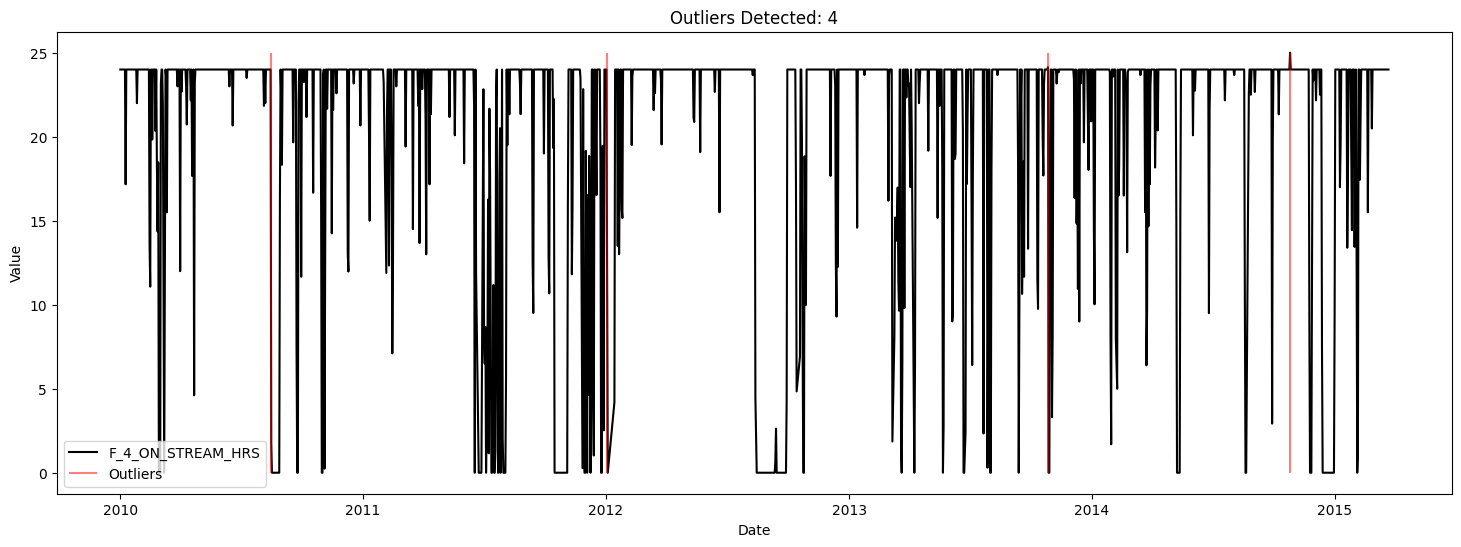

In [1775]:
# Plotting the outliers detected in the 'F_4_ON_STREAM_HRS' variable
clean.plot_outliers(F_4_ON_STREAM_HRS_outliers, color='red', alpha=0.5, legend_loc='lower left')

In [1776]:
df['F_4_ON_STREAM_HRS'] = clean.treat_outliers_in_time()

In [1777]:
# Detecting outliers in the 'F_4_ON_STREAM_HRS' variable
F_4_ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('F_4_ON_STREAM_HRS', 'F_4_BORE_WI_VOL')
F_4_ON_STREAM_HRS_outliers

'No outliers detected.'

In [1778]:
# Plotting the outliers detected in the 'F_4_ON_STREAM_HRS' variable
clean.plot_outliers(F_4_ON_STREAM_HRS_outliers, color='red', alpha=0.5, legend_loc='lower left')

No outliers detected.


* Injection on stream hours for well F_5

In [1779]:
# Detecting outliers in the 'F_5_ON_STREAM_HRS' variable
F_5_ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('F_5_ON_STREAM_HRS', 'F_5_BORE_WI_VOL')
F_5_ON_STREAM_HRS_outliers

DATEPRD
2010-10-31    25.00000
2012-01-03    11.22500
2013-03-14     0.16667
2013-10-27    24.14167
2014-10-26    25.00000
Name: F_5_ON_STREAM_HRS, dtype: float64

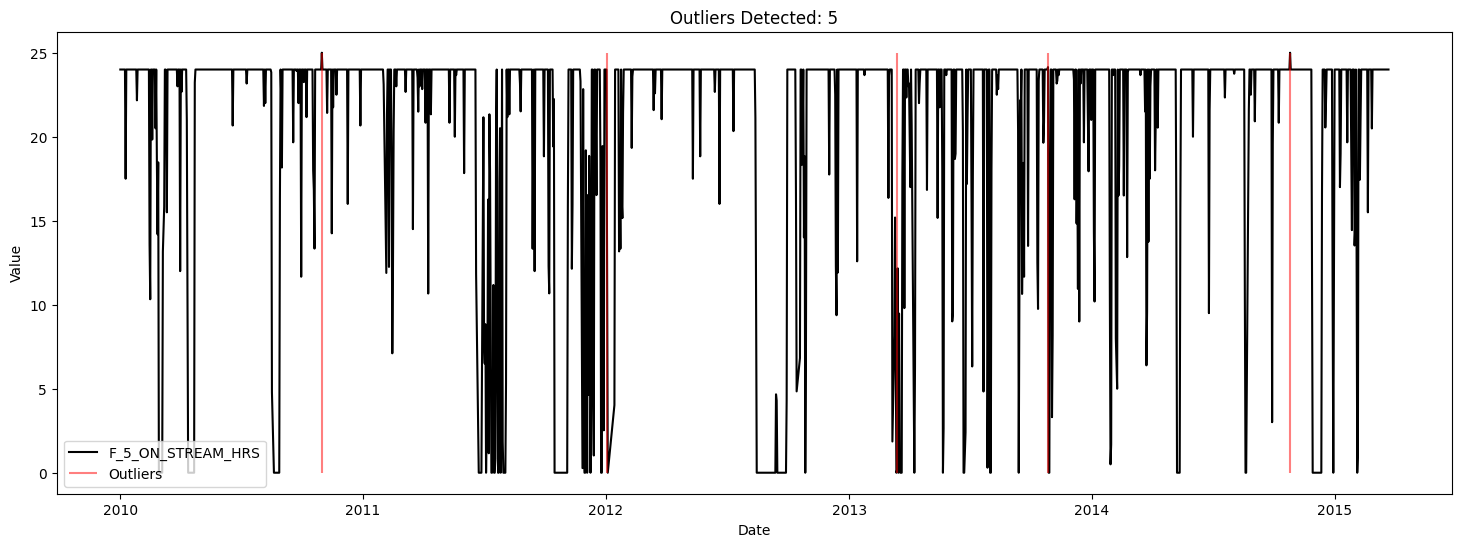

In [1780]:
# Plotting the outliers detected in the 'F_5_ON_STREAM_HRS' variable
clean.plot_outliers(F_5_ON_STREAM_HRS_outliers, color='red', alpha=0.5, legend_loc='lower left')

In [1781]:
df['F_5_ON_STREAM_HRS'] = clean.treat_outliers_in_time()

In [1782]:
# Detecting outliers in the 'F_5_ON_STREAM_HRS' variable
F_5_ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('F_5_ON_STREAM_HRS', 'F_5_BORE_WI_VOL')
F_5_ON_STREAM_HRS_outliers

'No outliers detected.'

In [1783]:
# Plotting the outliers detected in the 'F_5_ON_STREAM_HRS' variable
clean.plot_outliers(F_5_ON_STREAM_HRS_outliers, color='red', alpha=0.5, legend_loc='lower left')

No outliers detected.


* Oil production rate

In [1784]:
# Detecting outliers in the 'BORE_OIL_VOL' variable
BORE_OIL_VOL_outliers = clean.detect_outliers_in_rate('BORE_OIL_VOL', 'ON_STREAM_HRS')
BORE_OIL_VOL_outliers

'No outliers detected.'

* Gas production rate

In [1785]:
# Plotting the outliers detected in the 'BORE_GAS_VOL' variable
BORE_GAS_VOL_outliers = clean.detect_outliers_in_rate('BORE_GAS_VOL', 'ON_STREAM_HRS')
BORE_GAS_VOL_outliers

DATEPRD
2011-12-26    1991.04091
Name: BORE_GAS_VOL, dtype: float64

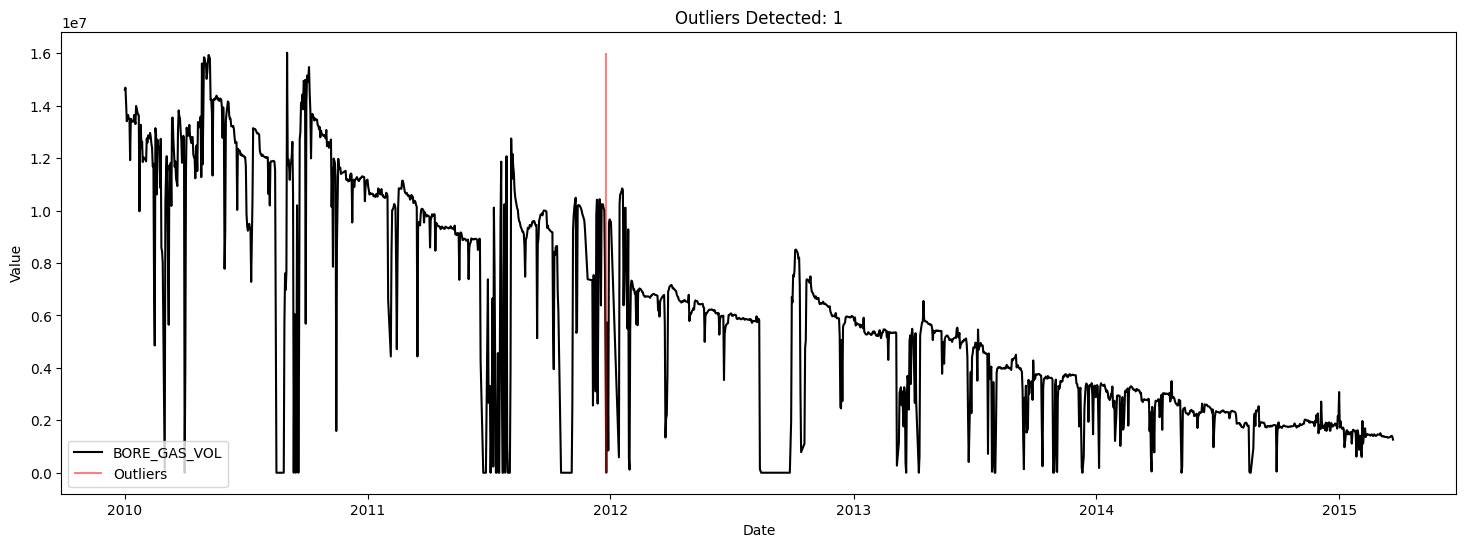

In [1786]:
# Plotting the outliers detected in the 'BORE_GAS_VOL' variable
clean.plot_outliers(BORE_GAS_VOL_outliers, color='red', alpha=0.5, legend_loc='lower left')

In [1787]:
df['BORE_GAS_VOL'] = clean.treat_outliers_in_rate()

In [1788]:
# Plotting the outliers detected in the 'BORE_GAS_VOL' variable
BORE_GAS_VOL_outliers = clean.detect_outliers_in_rate('BORE_GAS_VOL', 'ON_STREAM_HRS')
BORE_GAS_VOL_outliers

'No outliers detected.'

* Water production rate

In [1789]:
# Detecting outliers in the 'BORE_WAT_VOL' variable
BORE_WAT_VOL_outliers = clean.detect_outliers_in_rate('BORE_WAT_VOL', 'ON_STREAM_HRS')
BORE_WAT_VOL_outliers

DATEPRD
2011-12-26    283.796254
Name: BORE_WAT_VOL, dtype: float64

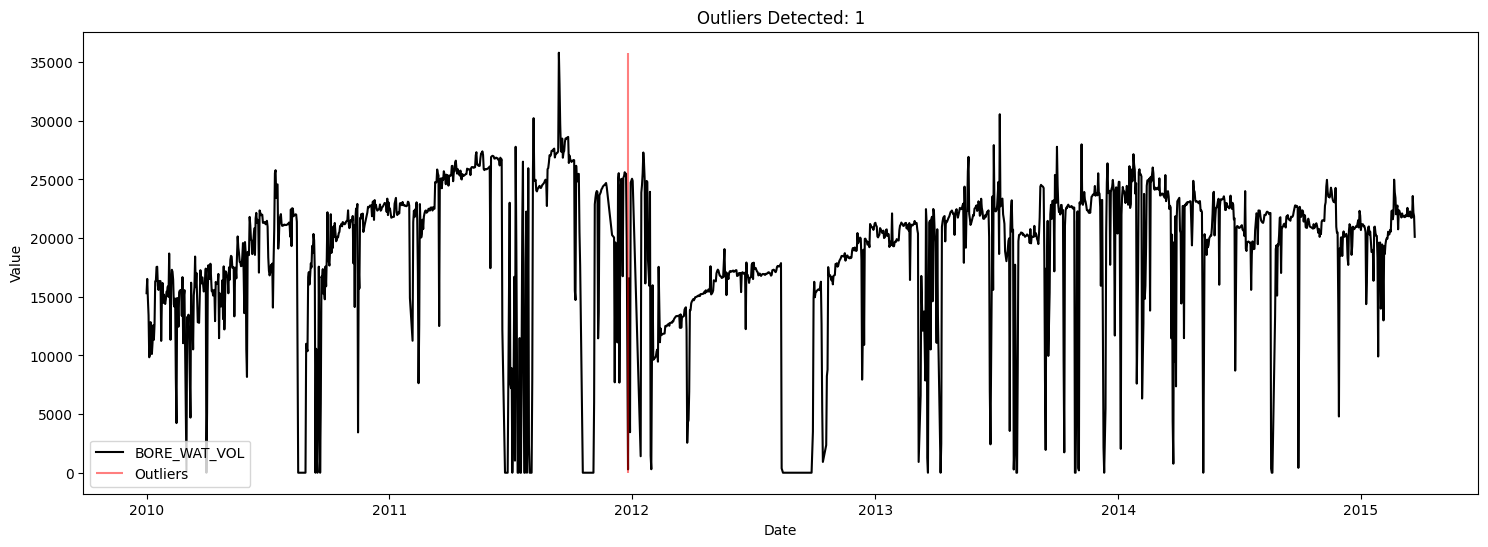

In [1790]:
# Plotting the outliers detected in the 'BORE_WAT_VOL' variable
clean.plot_outliers(BORE_WAT_VOL_outliers, color='red', alpha=0.5, legend_loc='lower left')

In [1791]:
df['BORE_WAT_VOL'] = clean.treat_outliers_in_rate()

In [1792]:
# Detecting outliers in the 'BORE_WAT_VOL' variable
BORE_WAT_VOL_outliers = clean.detect_outliers_in_rate('BORE_WAT_VOL', 'ON_STREAM_HRS')
BORE_WAT_VOL_outliers

'No outliers detected.'

* Injected water volume for well F_4

In [1793]:
# Detecting outliers in the 'F_4_BORE_WI_VOL' variable
F_4_BORE_WI_VOL_outliers = clean.detect_outliers_in_rate('F_4_BORE_WI_VOL', 'F_4_ON_STREAM_HRS')
len(F_4_BORE_WI_VOL_outliers)

49

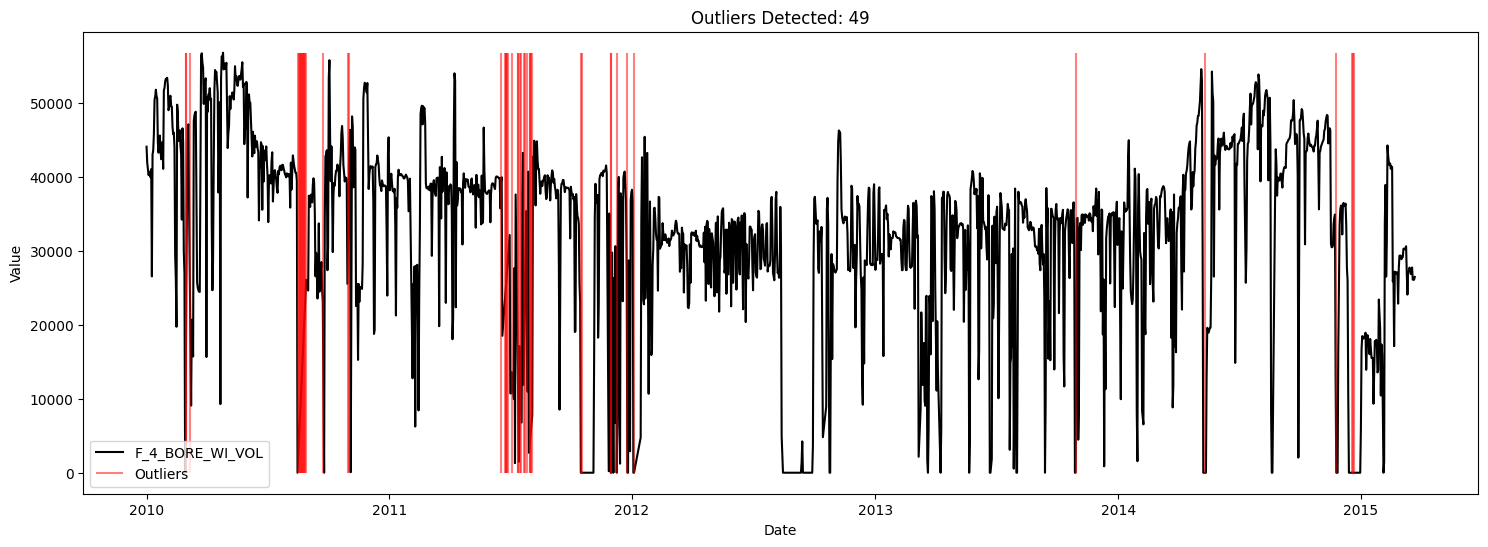

In [1794]:
#  Plotting the outliers detected in the 'F_4_BORE_WI_VOL' variable
clean.plot_outliers(F_4_BORE_WI_VOL_outliers, color='red', alpha=0.5, legend_loc='lower left')

In [1795]:
df['F_4_BORE_WI_VOL'] = clean.treat_outliers_in_rate()

In [1796]:
# Detecting outliers in the 'F_4_BORE_WI_VOL' variable
F_4_BORE_WI_VOL_outliers = clean.detect_outliers_in_rate('F_4_BORE_WI_VOL', 'F_4_ON_STREAM_HRS')
F_4_BORE_WI_VOL_outliers 

'No outliers detected.'

* Injected water volume for well F_5

In [1797]:
#  Detecting outliers in the 'F_5_BORE_WI_VOL' variable
F_5_BORE_WI_VOL_outliers = clean.detect_outliers_in_rate('F_5_BORE_WI_VOL', 'F_5_ON_STREAM_HRS')
len(F_5_BORE_WI_VOL_outliers)

54

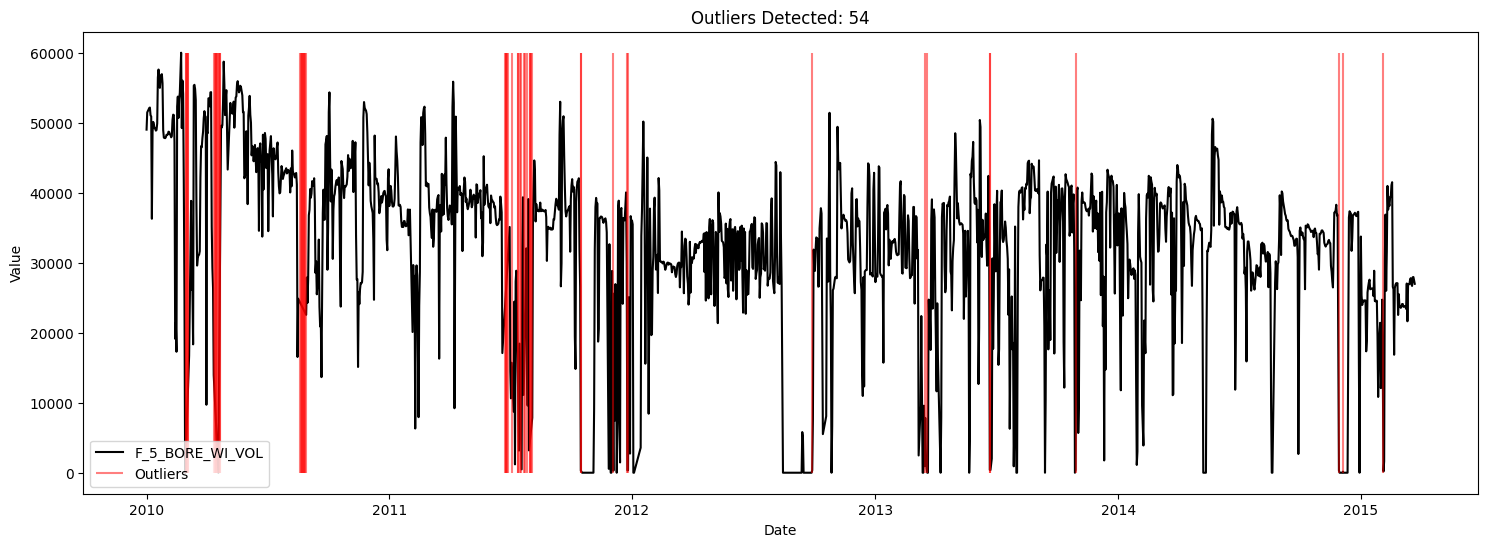

In [1798]:
# Plotting the outliers detected in the 'F_5_BORE_WI_VOL' variable
clean.plot_outliers(F_5_BORE_WI_VOL_outliers, color='red', alpha=0.5, legend_loc='lower left')

In [1799]:
df['F_5_BORE_WI_VOL'] = clean.treat_outliers_in_rate()

In [1800]:
#  Detecting outliers in the 'F_5_BORE_WI_VOL' variable
F_5_BORE_WI_VOL_outliers = clean.detect_outliers_in_rate('F_5_BORE_WI_VOL', 'F_5_ON_STREAM_HRS')
F_5_BORE_WI_VOL_outliers

'No outliers detected.'

In [1802]:
#  Detecting outliers in the 'F_5_BORE_WI_VOL' variable
F_5_BORE_WI_VOL_outliers = clean.detect_outliers_in_rate('F_5_BORE_WI_VOL', 'F_5_ON_STREAM_HRS')
F_5_BORE_WI_VOL_outliers

'No outliers detected.'

* Average downhole pressure

In [1805]:
# We will detect outliers in the 'AVG_DOWNHOLE_PRESSURE' variable using the default method 'Identify the proper roc (rate of change)
# by calculating the quantile in each window'
AVG_DOWNHOLE_PRESSURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_PRESSURE', window_size= 180, verbose=True)

Number of intervals: 10
The rate of change for segment [2010-01-01, 2010-06-30] is 287.3 with a mean of 3536.97
The rate of change for segment [2010-06-30, 2010-12-27] is 164.58 with a mean of 3601.58
The rate of change for segment [2010-12-27, 2011-06-25] is 159.53 with a mean of 3550.52
The rate of change for segment [2011-06-25, 2011-12-22] is 386.13 with a mean of 3578.97
The rate of change for segment [2011-12-22, 2012-06-19] is 345.42 with a mean of 3339.53
The rate of change for segment [2012-06-19, 2012-12-16] is 360.22 with a mean of 3422.69
The rate of change for segment [2012-12-16, 2013-06-14] is 201.45 with a mean of 3535.37
The rate of change for segment [2013-06-14, 2013-12-11] is 316.72 with a mean of 3612.11
The rate of change for segment [2013-12-11, 2014-06-09] is 197.87 with a mean of 3711.63
The rate of change for segment [2014-06-09, 2015-03-23] is 93.67 with a mean of 3802.72
Rate of change for each window of size 180 is: [287.3, 164.58, 159.53, 386.13, 345.42, 3

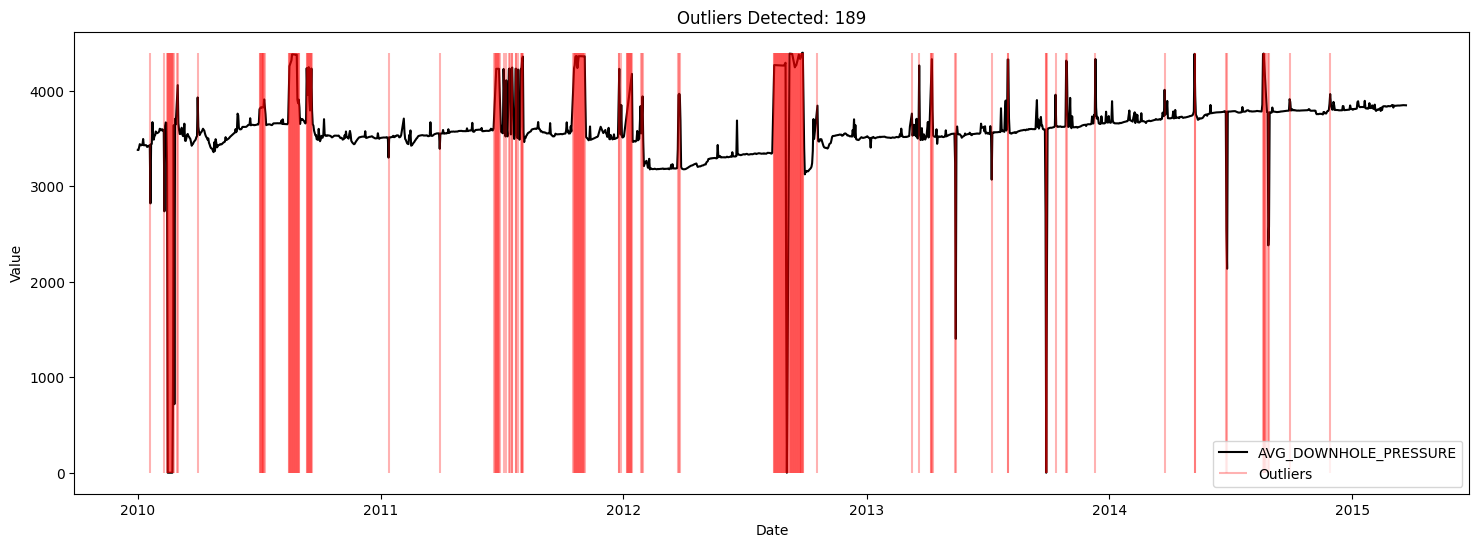

In [1806]:
# Plotting the outliers detected in the 'AVG_DOWNHOLE_PRESSURE' variable
clean.plot_outliers( AVG_DOWNHOLE_PRESSURE_outliers, color='red', alpha=0.3, legend_loc='lower right')

In [1807]:
# Based on domain knowledge, We will take the rate of change for each window execpt the last one since they dont seam to be outliers
# This is becasue most observations in the last window are gradually increasing compared to observations in other windows; therefore,
# the computed rate of change is not that high and any observations above or below this boundary  
# (roc ± mean of the respective windw) are considered outliers
# We will change the rate of change for the last window to 197 same as the previous window
AVG_DOWNHOLE_PRESSURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_PRESSURE', window_size= 180, 
                                        rate_of_change= [295.28, 144.31, 159.55, 404.01, 328.31, 343.99, 192.96, 298.35, 197.88, 197.88])

It is important to note that calling the `detect_outliers_with_roc` function after `treat_outliers_with_roc` may show outliers again, as this function computes the mean of each window again, and the mean may change after the outliers are treated. This change may lead to a boundary that yields outliers again.

To check for outliers again after treatment, you can call `detect_outliers_with_roc` again. If you still believe that there are outliers, you can call `treat_outliers_with_roc` again until you obtain satisfactory results. In this case, I am satisfied with first round of treatment.

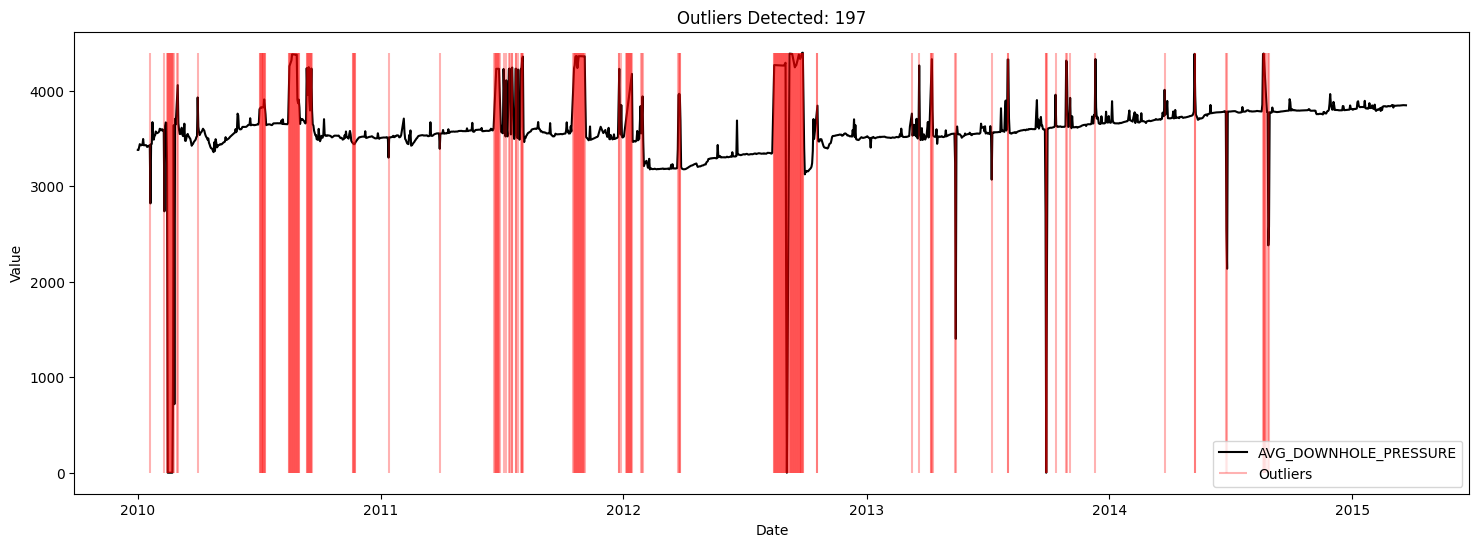

In [1808]:
# Plotting the outliers detected in the 'AVG_DOWNHOLE_PRESSURE' variable
clean.plot_outliers(AVG_DOWNHOLE_PRESSURE_outliers, color='red', alpha=0.3, legend_loc='lower right')

In [1809]:
df['AVG_DOWNHOLE_PRESSURE'] = clean.treat_outliers_with_roc(AVG_DOWNHOLE_PRESSURE_outliers)

* Average downhole temperature

In [1810]:
# We will detecting outliers in the 'AVG_DOWNHOLE_TEMPERATURE' variable using the default method same as the previous variable
AVG_DOWNHOLE_TEMPERATURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_TEMPERATURE', window_size= 180, verbose=True)

Number of intervals: 10
The rate of change for segment [2010-01-01, 2010-06-30] is 5.58 with a mean of 223.12
The rate of change for segment [2010-06-30, 2010-12-27] is 5.84 with a mean of 222.41
The rate of change for segment [2010-12-27, 2011-06-25] is 4.36 with a mean of 220.1
The rate of change for segment [2011-06-25, 2011-12-22] is 5.82 with a mean of 216.34
The rate of change for segment [2011-12-22, 2012-06-19] is 2.68 with a mean of 217.99
The rate of change for segment [2012-06-19, 2012-12-16] is 1.96 with a mean of 214.12
The rate of change for segment [2012-12-16, 2013-06-14] is 3.82 with a mean of 213.74
The rate of change for segment [2013-06-14, 2013-12-11] is 2.33 with a mean of 212.61
The rate of change for segment [2013-12-11, 2014-06-09] is 1.5 with a mean of 211.99
The rate of change for segment [2014-06-09, 2015-03-23] is 1.44 with a mean of 211.43
Rate of change for each window of size 180 is: [5.58, 5.84, 4.36, 5.82, 2.68, 1.96, 3.82, 2.33, 1.5, 1.44]
Variable: A

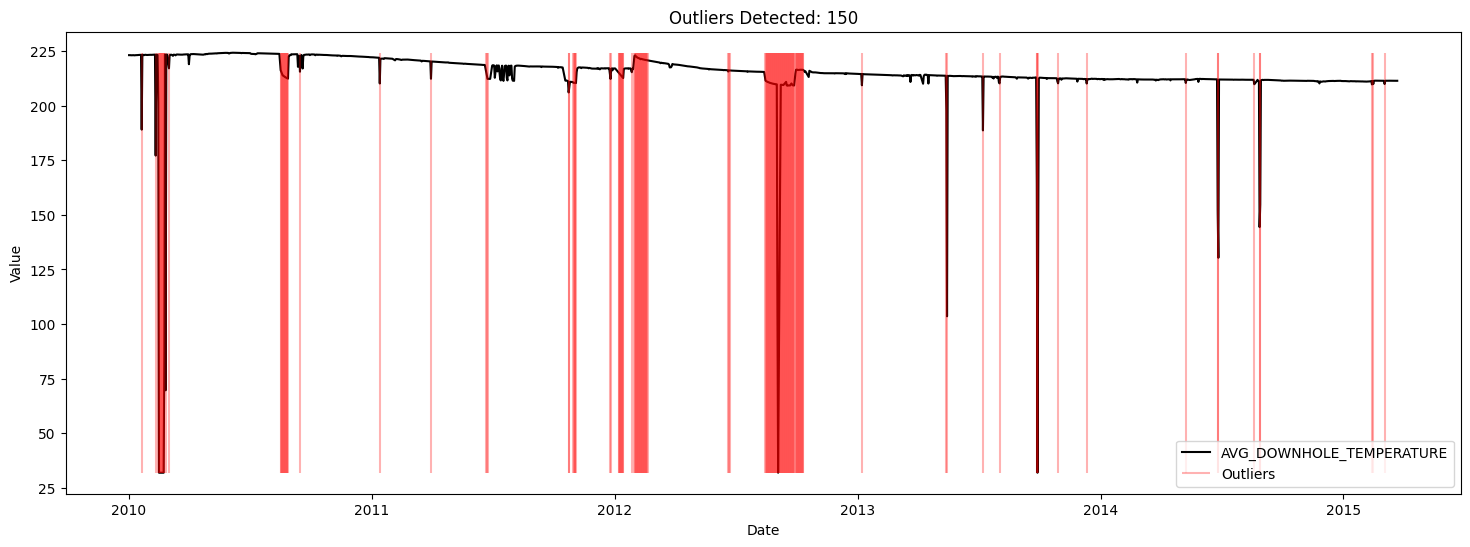

In [1811]:
# Plotting the outliers detected in the 'AVG_DOWNHOLE_TEMPERATURE' variable
clean.plot_outliers(AVG_DOWNHOLE_TEMPERATURE_outliers, color='red', alpha=0.3, legend_loc='lower right')

In [1812]:
# Most of the values detected on the previous plot are not outliers; therefore, we will take the maximum rate of change, 5.99, and set it for all windows
AVG_DOWNHOLE_TEMPERATURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_TEMPERATURE', window_size= 180, 
                                        rate_of_change= [5.99], all_same_rate=True)

In [1813]:
len(AVG_DOWNHOLE_TEMPERATURE_outliers)

49

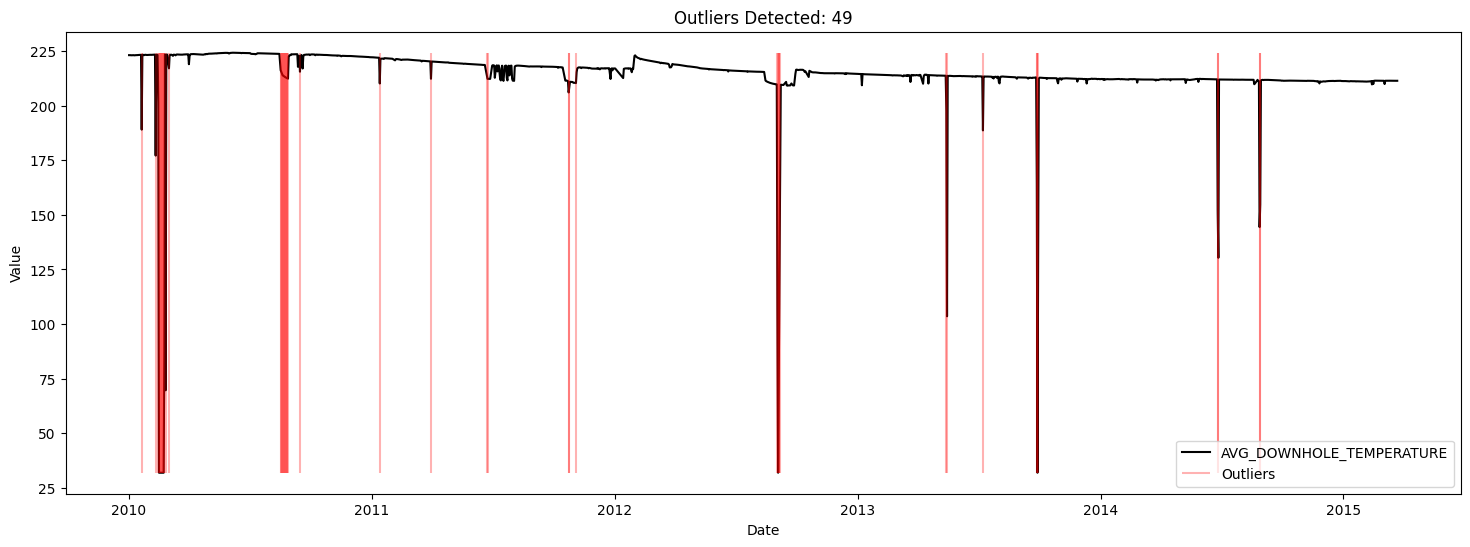

In [1814]:
# Voilà! these values are outliers
clean.plot_outliers(AVG_DOWNHOLE_TEMPERATURE_outliers, color='red', alpha=0.3, legend_loc='lower right')

In [1815]:
df['AVG_DOWNHOLE_TEMPERATURE'] = clean.treat_outliers_with_roc(AVG_DOWNHOLE_TEMPERATURE_outliers)

* Average wellhead temperature

In [1816]:
AVG_WHT_P_outliers = clean.detect_outliers_with_roc('AVG_WHT_P', window_size= 180)

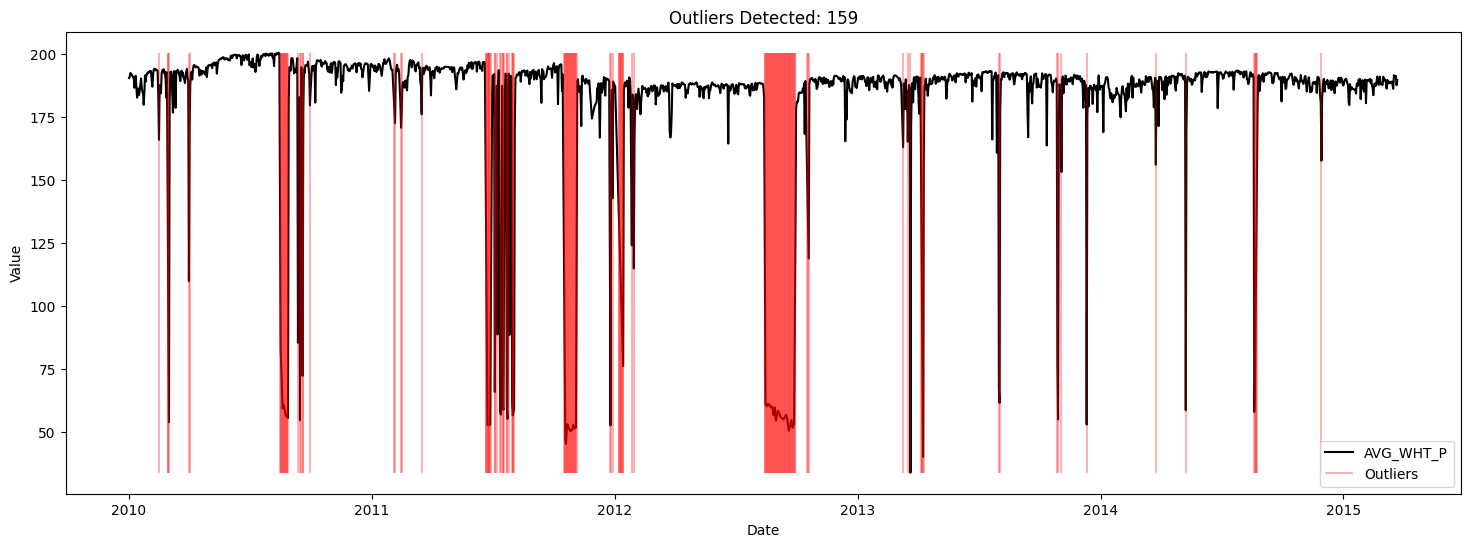

In [1817]:
clean.plot_outliers(AVG_WHT_P_outliers, color='red', alpha=0.3, legend_loc='lower right')

In [1818]:
df['AVG_WHT_P'] = clean.treat_outliers_with_roc(AVG_WHT_P_outliers)

We will not modify the rate of change for `wellhead temperature` here becasue all values are  outliers.

* Average choke size

In [1819]:
AVG_CHOKE_SIZE_P_outliers = clean.detect_outliers_in_choke('AVG_CHOKE_SIZE_P', 'ON_STREAM_HRS')

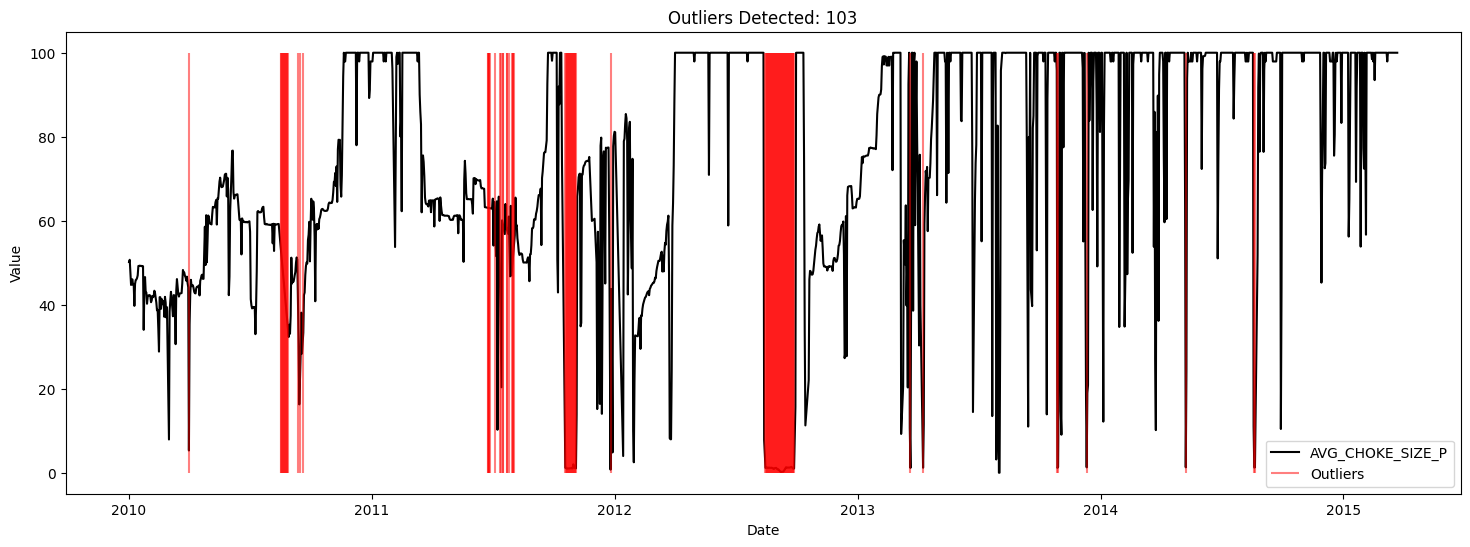

In [1820]:
clean.plot_outliers(AVG_CHOKE_SIZE_P_outliers, color='red', alpha=0.5)

In [1821]:
df['AVG_CHOKE_SIZE_P'] = clean.treat_outliers_in_choke()

In [1822]:
AVG_CHOKE_SIZE_P_outliers = clean.detect_outliers_in_choke('AVG_CHOKE_SIZE_P', 'ON_STREAM_HRS')
AVG_CHOKE_SIZE_P_outliers 

'No outliers detected.'

In [1823]:
clean.plot_outliers(AVG_CHOKE_SIZE_P_outliers, color='red', alpha=0.5)

No outliers detected.


In [1824]:
# Check the summary statistics of the data set again to see if the outliers have been removed and statistical properties of the data set have been improved
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,1908.0,2.131509e+01,6.603978e+00,0.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
AVG_DOWNHOLE_PRESSURE,1908.0,3.578876e+03,1.633534e+02,3123.138842,3.507990e+03,3.571410e+03,3.685400e+03,3.963025e+03
AVG_DOWNHOLE_TEMPERATURE,1908.0,2.162147e+02,4.495542e+00,209.122718,2.120674e+02,2.148066e+02,2.201917e+02,2.241909e+02
AVG_CHOKE_SIZE_P,1908.0,7.306048e+01,3.020756e+01,0.000000,5.290726e+01,7.776745e+01,1.000000e+02,1.000000e+02
AVG_WHP_P,1908.0,5.826448e+02,2.369819e+02,4.962176,4.669124e+02,5.091011e+02,6.257201e+02,1.823394e+03
AVG_WHT_P,1908.0,1.887409e+02,6.996049e+00,125.826190,1.867417e+02,1.897186e+02,1.924510e+02,2.003173e+02
DP_CHOKE_SIZE,1908.0,1.659621e+02,2.602976e+02,0.914898,4.255220e+01,8.167230e+01,1.787764e+02,1.823394e+03
BORE_OIL_VOL,1908.0,7.104866e+03,5.023856e+03,0.000000,2.835069e+03,6.121653e+03,1.093925e+04,2.000594e+04
BORE_GAS_VOL,1908.0,6.013343e+06,4.127597e+06,0.000000,2.346537e+06,5.466016e+06,9.490638e+06,1.602415e+07
BORE_WAT_VOL,1908.0,1.839823e+04,6.821178e+03,0.000000,1.616590e+04,2.063322e+04,2.267823e+04,3.580016e+04


In [1825]:
# Save the cleaned data set to a csv file 
df.to_csv('cleaned_F_14.csv')